# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [6]:
# Building Machine Learning Model

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [8]:
df_final = pd.read_csv('delaney_mordred_truncated.csv')

In [10]:
df_final.head()

,Compound ID,SMILES,measured log(solubility:mol/L),nBase,SpAbs_A,SpMax_A,SpMAD_A,VR1_A,nAromAtom,nSpiro,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,Lipinski,GhoseFilter
0,"1,1,1,2-Tetrachloroethane",ClCC(Cl)(Cl)Cl,-2.18,0,5.818626,2.074313,0.969771,11.637367,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,"1,1,1-Trichloroethane",CC(Cl)(Cl)Cl,-2.00,0,4.000000,2.000000,0.800000,8.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,"1,1,2,2-Tetrachloroethane",ClC(Cl)C(Cl)Cl,-1.74,0,6.000000,2.000000,1.000000,11.530010,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,"1,1,2-Trichloroethane",ClCC(Cl)Cl,-1.48,0,5.226252,1.847759,1.045250,8.629874,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,"1,1,2-Trichlorotrifluoroethane",FC(F)(Cl)C(F)(Cl)Cl,-3.04,0,7.211103,2.302776,0.901388,17.881697,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [12]:
y = df_final['measured log(solubility:mol/L)']

##### Scaling the Datset

In [16]:
scaled_DF = pd.DataFrame(StandardScaler().fit_transform(df_final.iloc[:,3:]), columns=([df_final.iloc[:,3:].columns]))

In [18]:
scaled_DF

,nBase,SpAbs_A,SpMax_A,SpMAD_A,VR1_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,Lipinski,GhoseFilter
0,-0.077041,-1.175105,-0.580433,-2.070914,-0.054329,-0.998199,-0.083918,-0.115751,0.221643,-0.665609,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
1,-0.077041,-1.376970,-0.836554,-3.581231,-0.054800,-0.998199,-0.083918,-0.115751,-0.134981,-0.665609,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
2,-0.077041,-1.154972,-0.836554,-1.801990,-0.054342,-0.998199,-0.083918,-0.115751,0.221643,-0.665609,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
3,-0.077041,-1.240858,-1.361255,-1.399434,-0.054718,-0.998199,-0.083918,-0.115751,-0.134981,-0.665609,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
4,-0.077041,-1.020541,0.206966,-2.679264,-0.053520,-0.998199,-0.083918,-0.115751,0.934889,-0.665609,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,-0.077041,0.307854,-0.069105,-0.034574,-0.043812,-0.998199,-0.083918,-0.115751,1.648136,0.106660,...,-0.238822,-0.483302,-0.067147,0.924116,1.707763,0.978429,0.678936,-0.363983,0.332685,1.195355
1140,-0.077041,0.564533,0.932061,-0.076533,-0.042132,0.149864,-0.083918,-0.115751,0.934889,0.106660,...,1.635311,0.094811,0.667960,1.076249,1.045923,0.342555,-0.468026,-0.363983,0.332685,1.195355
1141,-0.077041,1.447647,0.824890,0.691743,-0.033104,2.063300,-0.083918,-0.115751,0.221643,-0.665609,...,0.091029,0.186854,0.496599,0.214640,0.943934,0.362070,1.330076,-0.363983,0.332685,1.195355
1142,-0.077041,1.191848,0.671904,-0.199625,-0.036134,1.297926,-0.083918,-0.115751,1.648136,0.878928,...,0.640781,0.227942,1.205983,0.236964,0.969974,2.847035,0.695862,3.315455,0.332685,1.195355


##### Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(scaled_DF, y, test_size=0.20, random_state=45)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
print(f'The r2 score for train set is : {lr.score(X_train, y_train)}')
print(f'The r2 score for test set is : {lr.score(X_test, y_test)}')

The r2 score for train set is : 0.947133465482075
The r2 score for test set is : 0.40475472438335214


In [29]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9853846526207543
The r2 score for test set is : 0.874469524779752


#### Scikit Learn's Feature Importance Algorithm

In scikit-learn, the feature importance in a Random Forest regression model can be obtained through the feature_importances_ attribute. This attribute provides a relative importance score for each feature in the dataset based on how much each feature contributes to reducing the impurity (e.g., mean squared error) in the construction of the decision trees within the Random Forest.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'FilterItLogS'),
  Text(1, 0, 'Lipinski'),
  Text(2, 0, 'SIC0'),
  Text(3, 0, 'RNCG'),
  Text(4, 0, 'ATS0Z'),
  Text(5, 0, 'RPCG')])

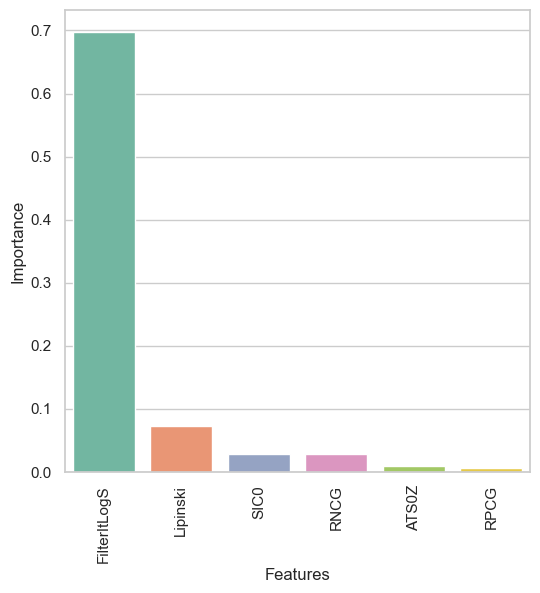

In [35]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
dicts = {
    'Features':[x for x in df_final.iloc[:,3:].columns],
    'Importance':importance
    }
DF_imp = pd.DataFrame(dicts)
DF_imp = DF_imp.sort_values('Importance',ascending=False)
DF_imp.to_excel('imp.xlsx', index=None)

# plot feature importance
top_desc_fi = DF_imp[:6]
plt.subplots(figsize=(6,6))
sns.barplot(data=top_desc_fi, x = 'Features', y='Importance', palette = 'Set2')
# plt.bar('Feature','Importance',data = DF_imp.iloc[:7,:])
plt.xticks(rotation = 90)
# plt.show()
# plt.savefig('fi.png', dpi=300, bbox_inches='tight')

### Scikit Learn's Permutation Importance

Permutation importance works by permuting the values of a single feature and measuring the change in the model's performance (e.g., accuracy or mean squared error). The idea is that important features, when permuted, will cause a significant drop in model performance. Scikit-learn provides the permutation_importance function to calculate and extract permutation importance.


In [39]:
from sklearn.inspection import permutation_importance

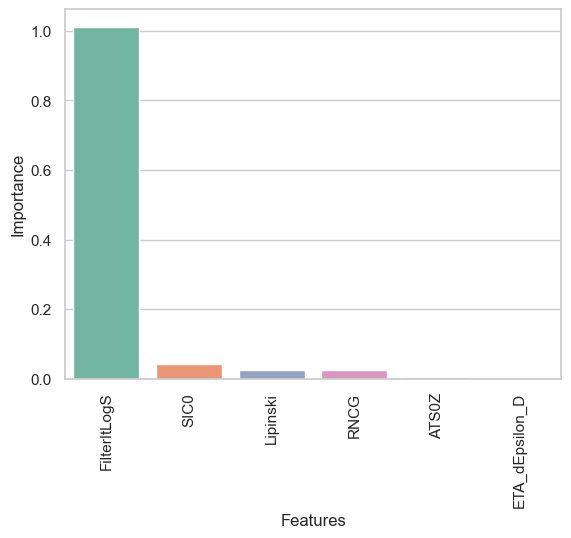

In [41]:
result = permutation_importance(
    rf, X_test, y_test, random_state=42)

dicts = {
    'Features':[x for x in df_final.iloc[:,3:].columns],
    'Importance':result.importances_mean
}
DF_pi = pd.DataFrame(dicts)
DF_pi = DF_pi.sort_values('Importance',ascending=False) #please note in the video there was a mistake
# In the line just above this comment, there was a typo which has been corrected in here.
# In the video it was DF_imp.sort_values('Importance', ascending=False) which was incorrect.
DF_pi.to_excel('imp.xlsx', index=None)

# plot feature importance
top_desc_pi = DF_pi[:6]
sns.barplot(data=top_desc_pi, x = 'Features', y='Importance', palette = 'Set2')
# plt.bar('Feature','Importance',data = DF_imp.iloc[:7,:])
plt.xticks(rotation = 90)
plt.show()

In [42]:
DF_pi.head()

,Features,Importance
154,FilterItLogS,1.010994
152,SIC0,0.042001
230,Lipinski,0.026066
97,RNCG,0.024863
17,ATS0Z,0.006001


### SHAP Feature Importance
SHAP feature importance is based on Shapley values from cooperative game theory, and it is used to explain the output of a model by assigning a value to each feature indicating its contribution to the model's prediction for a particular instance. SHAP values consider all possible combinations of features and calculate the average contribution of each feature to the prediction.



In [46]:
%%capture
!pip install shap
import shap

In [47]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

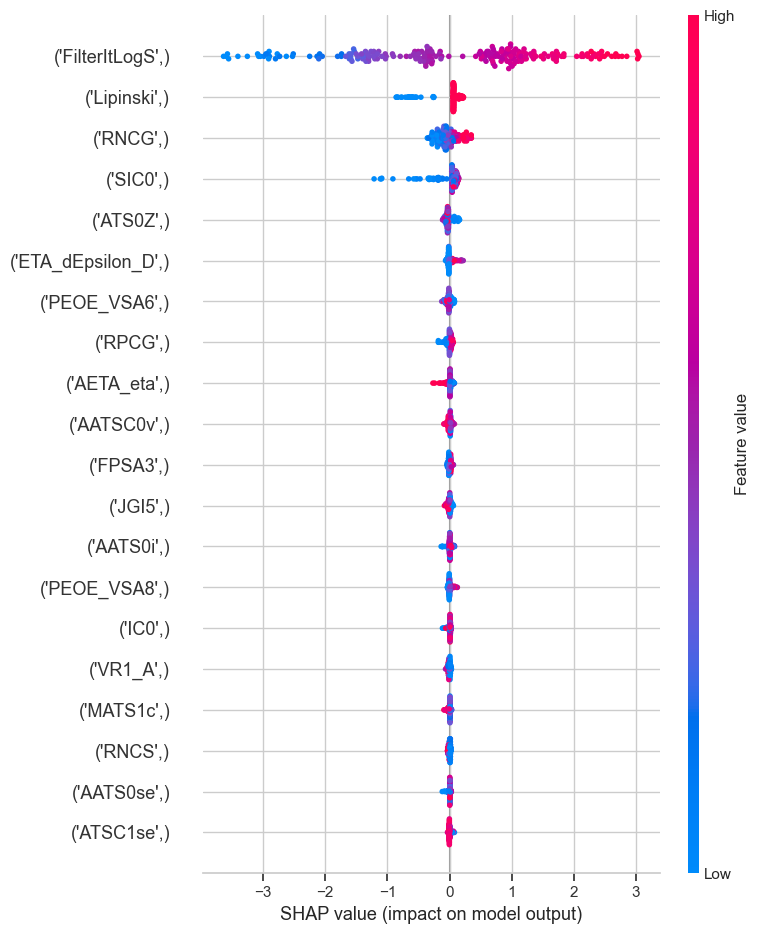

In [48]:
shap.summary_plot(shap_values, X_test)

### Model Evalualtion with Reduced Features

In [53]:
top_desc_fi['Features'][:5]

154    FilterItLogS
230        Lipinski
152            SIC0
97             RNCG
17            ATS0Z
Name: Features, dtype: object

In [55]:
scaled_DF_5 = scaled_DF[top_desc_fi['Features'][:5]]

In [57]:
scaled_DF_5.head()

,FilterItLogS,Lipinski,SIC0,RNCG,ATS0Z
0,0.021772,0.332685,1.784579,0.033750,0.534794
1,0.376467,0.332685,1.993944,-0.070165,0.121242
2,0.213155,0.332685,1.784579,-0.406439,0.534794
3,0.367089,0.332685,1.993944,0.263581,0.121242
4,0.089296,0.332685,1.993944,-0.255165,0.465869


In [59]:
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(scaled_DF_5, y, test_size=0.20, random_state=45)

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
print(f'The r2 score for train set is : {lr.score(X_train, y_train)}')
print(f'The r2 score for test set is : {lr.score(X_test, y_test)}')

The r2 score for train set is : 0.8306058685829611
The r2 score for test set is : 0.8283203470782355


In [69]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9803423747396938
The r2 score for test set is : 0.8490382894448798
